## Implementing Logical AND Function Using Perceptron Neural Network




### 1. Initializing Project and Reading Data From CSV Files 
In order to implement AND function, we need some libraries and packages:

- **numpy**: we use this library to calculate complex matrix operation
- **matplotlib**: this is a plotting library, here we use it in plotting **classification graph** and **test case accuracy graph** 
- **projects**: this is a project that contains all source code and impleemented neural networks.

**The source code of this particular project implemented in the src/projects/two_input_perceptron.py**

We are using 2 datasets for each functions (AND, OR): \
First one is our training dataset which includes **2 inputs**, **bias** and **target** value. **(training_dataset.csv)** \
Second on is for testing if our training proccess was successful or not. **(test_dataset.csv)**. \
All datasets exists in the **dataset** folder with CSV format.

**Here we are using binary input and bipolar target.**



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from projects import TwoInputPerceptron

training_dataset = np.genfromtxt("../dataset/perceptron/and/training_dataset.csv", delimiter=',', skip_header=1)
test_dataset = np.genfromtxt("../dataset/perceptron/and/test_dataset.csv", delimiter=',', skip_header=1)


numpy's genfromtxt() function expects three arguments and returns a **numpy array**: 
- **fname**: patch to our dataset.
- **delimeter**: delimeter which is used to separate values.
- **skip_header**: the number of lines to skip at the beginning of a file (we use it to ommiting the x1, x2, bias and target labels).

### 2. Train The Networks
Now we train our perceptron network using train() function implemented in **two_input_percepron.py** in **src/projects**. \
Here we are using learning_rate=1 and treshold(θ)=0.2, which can be easily changed.


In [7]:
and_perceptron = TwoInputPerceptron(learning_rate=1, threshold=0.2)

iteration_count = 1
while True:
    bias_old = and_perceptron.bias
    w1_old = and_perceptron.w1
    w2_old = and_perceptron.w2
    for vector in training_dataset:
        and_perceptron.train(vector[0], vector[1], vector[2], vector[3])
    
    if (w1_old == and_perceptron.w1) and (w2_old == and_perceptron.w2) and (bias_old == and_perceptron.bias):
        break
    iteration_count += 1


'The Iteration Count is 10'

### 3. Plotting Decision Regions and Classifaction Results
In this part we have correct weights for our network \
All we need is line that separate decision regions. \
This line is x2 = b + w1x1 / -w2x2 for 2 inputs.

For example we want to plot a line in range of (-2, 3) for x1. \
If we give [-1 and 2] to our line, we get [2 and 0] for x2.

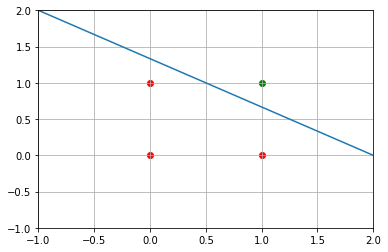

In [8]:
x1 = np.array([-1, 2]) # x1=[-1, 2]
x2 = (and_perceptron.bias + and_perceptron.w1 * x1) / (- and_perceptron.w2) # x2 = b + w1x1 / -w2x2, at the end will be x2=[2, 0]

plt.plot(x1, x2)
for vector in training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negetive area (red points)
    if vector[3] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

### 4. Plotting The Accuracy Chart
Here we plot a bar chart to indicate our accuaracy ratio, by counting number of cases which successfully produces the desired target value.

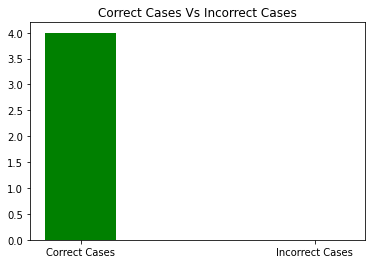

'w1: 2.0, w2: 3.0, bias: -4.0 | The Iteration Count is 10'

In [24]:
correct_cases = 0
for test_vector in test_dataset:
    net_input = and_perceptron.calculate_net_input(test_vector[0], test_vector[1])
    result = and_perceptron.activation_function(net_input)
    if result == test_vector[2]:
        correct_cases += 1
incorrect_cases = test_dataset.shape[0] - correct_cases

labels = ['Correct Cases', 'Incorrect Cases']
data = [correct_cases, incorrect_cases]

plt.bar(labels, data, color=('green', 'red'), width=0.3)
plt.title('Correct Cases Vs Incorrect Cases')
plt.show()

f"w1: {and_perceptron.w1}, w2: {and_perceptron.w2}, bias: {and_perceptron.bias} | The Iteration Count is {iteration_count}"

The final weights of our network is exactly what we expected. \
also we printed the counts of the iteration that took until algorithm finishes.